In [65]:
import numpy as np
import pandas as pd
from collections import Counter
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
def compute_spin_angle_phi(row):
    
    # find speed at release (initial velocity is given at 50 ft)
    tR = (-row['vy0'] - np.sqrt(row['vy0']**2 - 2*row['ay']*(50 - row['yR']))) / row['ay']
    vxR = row['vx0'] + row['ax']*tR
    vyR = row['vy0'] + row['ay']*tR
    vzR = row['vz0'] + row['az']*tR
    dv0 = row['v0'] - np.sqrt(vxR**2 + vyR**2 + vzR**2)/1.467

    # calculate x movement
    tf = (-vyR - np.sqrt(vyR**2 - 2*row['ay']*(row['yR'] - 17/12)))/row['ay']
    calculate_x_mvt = row['plate_x'] - row['xR'] - (vxR/vyR)*(17/12 - row['yR'])
    calculate_z_mvt = row['plate_z'] - row['zR'] - (vzR/vyR)*(17/12 - row['yR']) + 0.5*(32.174)*tf**2

    # average velocities
    vxbar = (2*vxR + row['ax']*tf)/2
    vybar = (2*vyR + row['ay']*tf)/2
    vzbar = (2*vzR + row['az']*tf)/2
    vbar = np.sqrt(vxbar**2 + vybar**2 + vzbar**2)

    # drag acceleration
    adrag = -(row['ax']*vxbar + row['ay']*vybar + (row['az'] + 32.174)*vzbar) / vbar
    Cd = adrag/8.598E-02/vbar**2

    # Magnus acceleration
    amagx = row['ax'] + adrag*vxbar / vbar
    amagy = row['ay'] + adrag*vybar / vbar
    amagz = row['az'] + adrag*vzbar / vbar + 32.174
    amag = np.sqrt(amagx**2 + amagy**2 + amagz**2)

    def compute_phi(amagx, amagz):
        if amagz > 0:
            return -np.arctan(amagx / amagz) * 180 / 3.14 + 180
        else:
            return 180 - np.arctan(amagx / amagz) * 180 / 3.14 + 180
    phi = compute_phi(amagx, amagz)

    return round(phi, 0)

In [67]:
data = pd.read_csv("../data/pitch_data_2019.csv")

data.rename(columns={'release_speed': 'v0', 'release_pos_x': 'xR', 'release_pos_y': 'yR', 'release_pos_z': 'zR'}, inplace=True)

# trevor bauer 
pitcher_id = 545333

# luis castillo
#pitcher_id = 622491
data = data[data['pitcher'] == pitcher_id]

# make sure the order of the pitches is correct
data.sort_values(by=['game_date', 'game_pk', 'inning', 'at_bat_number', 'pitch_number', 'outs_when_up'], ascending=True, inplace=True)

data.head()

,index,pitch_type,game_date,v0,xR,zR,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,fielder_2,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pitcher.1,fielder_2.1,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,yR,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment
722457,8539,FF,2019-03-30,95.2,-1.5981,5.5819,Trevor Bauer,596146.0,545333,NaN,ball,NaN,NaN,NaN,NaN,11.0,NaN,R,L,R,MIN,CLE,B,NaN,NaN,0.0,0.0,2019.0,-1.1556,1.4123,-1.8740,3.9263,NaN,NaN,NaN,0.0,1.0,Bot,NaN,NaN,NaN,NaN,547379.0,NaN,190330_182016,1.8571,-138.5546,-1.8183,-15.1812,33.2503,-13.9663,3.4359,1.710,NaN,NaN,NaN,94.825,2321.0,6.229,566963,545333.0,547379.0,467793.0,543543.0,608070.0,621559.0,641343.0,547982.0,571980.0,54.2700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,4-Seam Fastball,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard
722456,8535,FF,2019-03-30,94.7,-1.4901,5.5726,Trevor Bauer,596146.0,545333,NaN,foul,NaN,NaN,NaN,NaN,5.0,NaN,R,L,R,MIN,CLE,S,NaN,NaN,1.0,0.0,2019.0,-1.0325,1.2073,-0.2573,2.6601,NaN,NaN,NaN,0.0,1.0,Bot,NaN,NaN,NaN,NaN,547379.0,NaN,190330_182031,5.4901,-137.8402,-4.6122,-14.2811,29.6976,-16.0824,3.5490,1.627,54.0,71.9,85.2,94.607,2209.0,6.151,566963,545333.0,547379.0,467793.0,543543.0,608070.0,621559.0,641343.0,547982.0,571980.0,54.3482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,4-Seam Fastball,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard
722455,8511,FF,2019-03-30,95.0,-1.4960,5.5863,Trevor Bauer,596146.0,545333,field_out,hit_into_play,NaN,NaN,NaN,NaN,1.0,Max Kepler pops out to third baseman Jose Rami...,R,L,R,MIN,CLE,X,5.0,popup,1.0,1.0,2019.0,-0.9056,1.5598,-0.6269,3.0406,NaN,NaN,NaN,0.0,1.0,Bot,67.65,160.47,NaN,NaN,547379.0,NaN,190330_182104,4.2879,-138.2445,-4.4937,-12.5143,30.1054,-11.4651,3.5490,1.627,NaN,80.0,69.0,94.990,2384.0,6.230,566963,545333.0,547379.0,467793.0,543543.0,608070.0,621559.0,641343.0,547982.0,571980.0,54.2699,0.0,0.0,0.0,1.0,0.0,0.0,3.0,4.0,3.0,4-Seam Fastball,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard
722454,8507,FF,2019-03-30,93.7,-1.5810,5.5548,Trevor Bauer,593871.0,545333,NaN,swinging_strike,NaN,NaN,NaN,NaN,4.0,NaN,R,L,R,MIN,CLE,S,NaN,NaN,0.0,0.0,2019.0,-1.1602,1.5174,-0.5414,2.4723,NaN,NaN,NaN,1.0,1.0,Bot,NaN,NaN,NaN,NaN,547379.0,NaN,190330_182148,5.1782,-136.2474,-5.4724,-15.4044,30.9719,-12.5648,3.3190,1.513,NaN,NaN,NaN,92.982,2152.0,5.982,566963,545333.0,547379.0,467793.0,543543.0,608070.0,621559.0,641343.0,547982.0,571980.0,54.5175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,4-Seam Fastball,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard
722453,8484,FT,2019-03-30,94.6,-1.5686,5.4609,Trevor Bauer,593871.0,545333,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,L,R,MIN,CLE,S,NaN,NaN,0.0,1.0,2019.0,-1.4907,0.9636,-0.3626,2.4099,NaN,NaN,NaN,1.0,1.0,Bot,NaN,NaN,NaN,NaN,547379.0,NaN,190330_182206,6.3841,-137.5682,-4.4105,-20.1207,27.9544,-19.3224,3.3190,1.513,211.0,76.0,36.3,94.397,2189.0,6.019,566963,545333.0,547379.0,467793.0,543543.0,608070.0,621559.0,641343.0,547982.0,571980.0,54.4807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,2-Seam Fastball,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Standard,Standard


In [69]:
cols_to_keep = ['pitch_type', 'game_date', 'game_pk', 'inning', 'outs_when_up', 
                'events', 'des',
                'v0', 'xR', 'yR', 'zR',
                'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 
                'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 
                'launch_speed', 'launch_angle']

data = data[cols_to_keep]

print(data['game_pk'].unique())

data.head()

[566963 565318 565514 566381 565322 565615 567375 565330 566106 565334
 565339 565344 567292 565347 565351 565546 565353 565358 565743 565264
 565360 565365 566913 565756 567222 565278 565954 565285 566245 566599
 565290 566441 564904 565297]


,pitch_type,game_date,game_pk,inning,outs_when_up,events,des,v0,xR,yR,zR,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,launch_speed,launch_angle
722457,FF,2019-03-30,566963,1.0,0.0,NaN,NaN,95.2,-1.5981,54.2700,5.5819,-1.1556,1.4123,-1.8740,3.9263,1.8571,-138.5546,-1.8183,-15.1812,33.2503,-13.9663,NaN,NaN
722456,FF,2019-03-30,566963,1.0,0.0,NaN,NaN,94.7,-1.4901,54.3482,5.5726,-1.0325,1.2073,-0.2573,2.6601,5.4901,-137.8402,-4.6122,-14.2811,29.6976,-16.0824,71.9,85.2
722455,FF,2019-03-30,566963,1.0,0.0,field_out,Max Kepler pops out to third baseman Jose Rami...,95.0,-1.4960,54.2699,5.5863,-0.9056,1.5598,-0.6269,3.0406,4.2879,-138.2445,-4.4937,-12.5143,30.1054,-11.4651,80.0,69.0
722454,FF,2019-03-30,566963,1.0,1.0,NaN,NaN,93.7,-1.5810,54.5175,5.5548,-1.1602,1.5174,-0.5414,2.4723,5.1782,-136.2474,-5.4724,-15.4044,30.9719,-12.5648,NaN,NaN
722453,FT,2019-03-30,566963,1.0,1.0,NaN,NaN,94.6,-1.5686,54.4807,5.4609,-1.4907,0.9636,-0.3626,2.4099,6.3841,-137.5682,-4.4105,-20.1207,27.9544,-19.3224,76.0,36.3


In [70]:
data = data[data['game_pk'] == 565318]

data['spin_angle'] = data.apply(compute_spin_angle_phi, axis=1)

data.head(10)

,pitch_type,game_date,game_pk,inning,outs_when_up,events,des,v0,xR,yR,zR,pfx_x,pfx_z,plate_x,plate_z,vx0,vy0,vz0,ax,ay,az,launch_speed,launch_angle,spin_angle
704312,FF,2019-04-04,565318,1.0,0.0,NaN,NaN,94.2,-1.4578,54.6048,5.5246,-0.8250,1.3268,0.1900,1.6473,6.0204,-136.8466,-7.2179,-11.4832,27.7859,-14.4253,NaN,NaN,214.0
704311,FF,2019-04-04,565318,1.0,0.0,NaN,NaN,94.0,-1.3231,54.0920,5.5222,-0.5841,1.3617,0.4851,3.7567,6.0001,-136.9380,-1.9364,-8.6303,28.0444,-14.7187,77.4,54.9,205.0
704310,SL,2019-04-04,565318,1.0,0.0,strikeout,Brandon Drury strikes out swinging.,81.6,-1.6079,55.0412,5.3895,1.9516,-0.1561,1.8261,0.9800,4.0213,-118.5578,-2.9240,16.8852,24.7585,-33.2656,NaN,NaN,441.0
704309,FF,2019-04-04,565318,1.0,1.0,NaN,NaN,94.9,-1.4602,54.1997,5.5413,-0.6840,1.5161,0.6952,2.6567,7.1546,-137.8587,-5.2105,-10.3506,32.4911,-11.9709,NaN,NaN,206.0
704308,KC,2019-04-04,565318,1.0,1.0,NaN,NaN,79.0,-1.2891,54.8598,5.7965,0.8697,-1.4072,-0.1831,3.3708,0.8197,-114.7830,4.0694,7.3028,22.6343,-45.3212,NaN,NaN,389.0
704307,KC,2019-04-04,565318,1.0,1.0,NaN,NaN,78.3,-1.2533,54.4069,5.8082,0.7482,-1.4892,0.1319,0.7709,1.6146,-113.9091,-1.2200,6.0867,22.8263,-44.9366,NaN,NaN,384.0
704306,CH,2019-04-04,565318,1.0,1.0,field_out,Socrates Brito grounds out to first baseman Ca...,87.9,-1.3727,54.3027,5.4350,-1.2869,0.3917,-0.0366,1.3582,5.8693,-127.8116,-4.5877,-15.2259,24.7385,-27.2068,84.8,-8.1,258.0
704305,FC,2019-04-04,565318,1.0,2.0,NaN,NaN,85.4,-1.5430,54.7095,5.6024,0.5317,-0.0429,2.1618,0.4323,7.6000,-124.2019,-5.8265,4.1615,21.1421,-31.8289,NaN,NaN,434.0
704304,FC,2019-04-04,565318,1.0,2.0,NaN,NaN,84.3,-1.5054,54.8256,5.6283,0.6350,-0.2550,1.1859,2.2815,4.9709,-122.6979,-1.0061,5.5051,20.4874,-34.7608,NaN,NaN,420.0
704303,FC,2019-04-04,565318,1.0,2.0,NaN,NaN,83.7,-1.4959,54.8724,5.5663,0.5521,-0.2675,0.8767,2.5257,4.3685,-121.9540,-0.2074,4.7159,20.0761,-34.9844,NaN,NaN,415.0


In [71]:
def get_FF_spin_angle(row):
    if row['pitch_type'] == 'FF':
        return row['spin_angle']
data['FF_spin_angle'] = data.apply(get_FF_spin_angle, axis=1)
data['FF_spin_angle'] = data['FF_spin_angle'].apply(lambda x: x - 360. if x > 360 else x)

def get_KC_spin_angle(row):
    if row['pitch_type'] == 'KC':
        return row['spin_angle']
data['KC_spin_angle'] = data.apply(get_KC_spin_angle, axis=1)
data['KC_spin_angle'] = data['KC_spin_angle'].apply(lambda x: x - 360. if x > 360 else x)

def get_CH_spin_angle(row):
    if row['pitch_type'] == 'CH':
        return row['spin_angle']
data['CH_spin_angle'] = data.apply(get_CH_spin_angle, axis=1)
data['CH_spin_angle'] = data['CH_spin_angle'].apply(lambda x: x - 360. if x > 360 else x)

def get_SL_spin_angle(row):
    if row['pitch_type'] == 'SL':
        return row['spin_angle']
data['SL_spin_angle'] = data.apply(get_SL_spin_angle, axis=1)
data['SL_spin_angle'] = data['SL_spin_angle'].apply(lambda x: x - 360. if x > 360 else x)

spin_data = data[['pitch_type', 'spin_angle', 'FF_spin_angle', 'KC_spin_angle', 'CH_spin_angle', 'SL_spin_angle']]

spin_data = spin_data.ffill().bfill()

spin_data['FF-KC Spin Diff'] = spin_data['FF_spin_angle'] - spin_data['KC_spin_angle'] - 180.
spin_data['FF-KC Spin Diff Rolling Mean'] = spin_data['FF-KC Spin Diff'].rolling(5).mean()
spin_data['FF Spin Rolling Mean'] = spin_data['FF_spin_angle'].rolling(10).mean()
spin_data['KC Spin Rolling Mean'] = spin_data['KC_spin_angle'].rolling(10).mean()

spin_data['CH-SL Spin Diff'] = spin_data['CH_spin_angle'] - spin_data['SL_spin_angle']
spin_data['CH-SL Spin Diff Rolling Mean'] = spin_data['CH-SL Spin Diff'].rolling(5).mean() 

spin_data.head()

,pitch_type,spin_angle,FF_spin_angle,KC_spin_angle,CH_spin_angle,SL_spin_angle,FF-KC Spin Diff,FF-KC Spin Diff Rolling Mean,FF Spin Rolling Mean,KC Spin Rolling Mean,CH-SL Spin Diff,CH-SL Spin Diff Rolling Mean
704312,FF,214.0,214.0,29.0,258.0,81.0,5.0,NaN,NaN,NaN,177.0,NaN
704311,FF,205.0,205.0,29.0,258.0,81.0,-4.0,NaN,NaN,NaN,177.0,NaN
704310,SL,441.0,205.0,29.0,258.0,81.0,-4.0,NaN,NaN,NaN,177.0,NaN
704309,FF,206.0,206.0,29.0,258.0,81.0,-3.0,NaN,NaN,NaN,177.0,NaN
704308,KC,389.0,206.0,29.0,258.0,81.0,-3.0,-1.8,NaN,NaN,177.0,177.0


In [72]:
Counter(spin_data['pitch_type'])

Counter({'FF': 35, 'SL': 16, 'KC': 24, 'CH': 15, 'FC': 20, 'FT': 7})

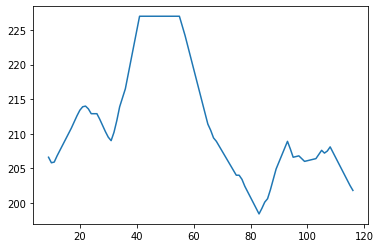

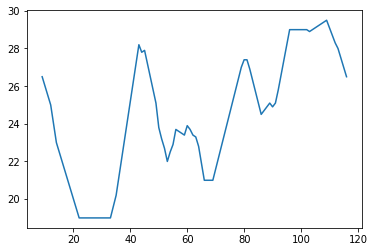

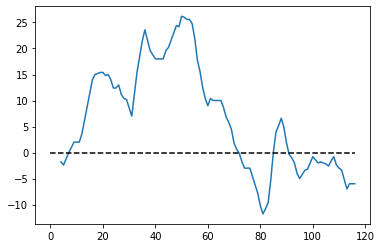

In [73]:
plt.plot(range(len(spin_data['FF Spin Rolling Mean'].tolist())), spin_data['FF Spin Rolling Mean'].tolist())
plt.show()

plt.plot(range(len(spin_data['KC Spin Rolling Mean'].tolist())), spin_data['KC Spin Rolling Mean'].tolist())
plt.show()

plt.plot(range(len(spin_data['FF-KC Spin Diff'].tolist())), spin_data['FF-KC Spin Diff Rolling Mean'].tolist())
plt.plot(range(len(spin_data['FF-KC Spin Diff'].tolist())), len(spin_data['FF-KC Spin Diff'].tolist()) * [0.], 'k--')
plt.show()

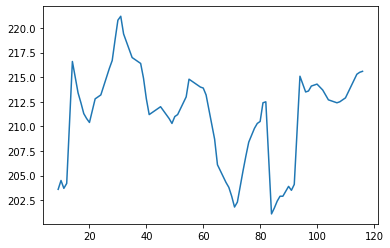

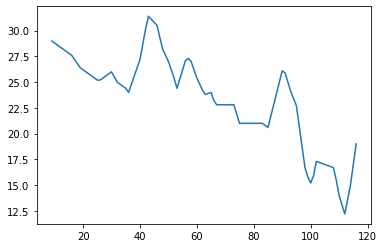

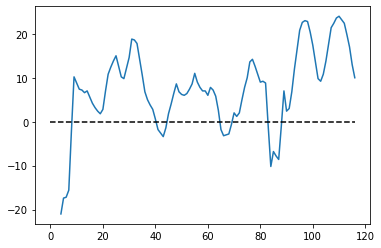

In [55]:
#plt.plot(range(len(spin_data['FF-KC Spin Diff'].tolist())), spin_data['FF-KC Spin Diff'].tolist())
plt.plot(range(len(spin_data['FF Spin Rolling Mean'].tolist())), spin_data['FF Spin Rolling Mean'].tolist())
plt.show()

plt.plot(range(len(spin_data['KC Spin Rolling Mean'].tolist())), spin_data['KC Spin Rolling Mean'].tolist())
plt.show()

plt.plot(range(len(spin_data['FF-KC Spin Diff'].tolist())), spin_data['FF-KC Spin Diff Rolling Mean'].tolist())
plt.plot(range(len(spin_data['FF-KC Spin Diff'].tolist())), len(spin_data['FF-KC Spin Diff'].tolist()) * [0.], 'k--')
plt.show()

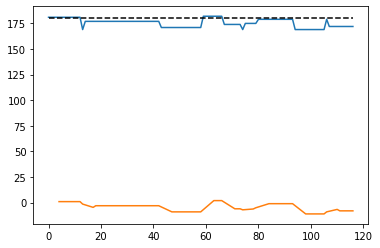

In [33]:
plt.plot(range(len(spin_data['CH-SL Spin Diff'].tolist())), spin_data['CH-SL Spin Diff'].tolist())
plt.plot(range(len(spin_data['CH-SL Spin Diff'].tolist())), spin_data['CH-SL Spin Diff Rolling Mean'].tolist())
plt.plot(range(len(spin_data['CH-SL Spin Diff'].tolist())), len(spin_data['CH-SL Spin Diff'].tolist()) * [180.], 'k--')

In [ ]:
data_pitch_type = data[['game_date', 'pitch_type', 'spin_axis', 'v0', 'plate_x', 'plate_z']].groupby(['game_date', 'pitch_type']).mean()

#data_pitch_type.reset_index(inplace=True, drop=False)

data_pitch_type['spin_axis'] = round(data_pitch_type['spin_axis'], 0)
data_pitch_type['v0'] = round(data_pitch_type['v0'], 1)

data_pitch_type

In [ ]:
plt.plot(data_pitch_type['plate_x'].tolist(), data_pitch_type['plate_z'].tolist(), '.')
plt.xlim([-0.8, 0.8])
plt.plot([-0.8, 0.8], [0, 0], 'k--')
plt.show()